In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("C:\Coding\Club (Model)\insurance.csv")

# EDA

In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [53]:
df.shape

(1338, 7)

In [54]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C:\Users\ritam\AppData\Local\Temp\ipykernel_26396\1034679541.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


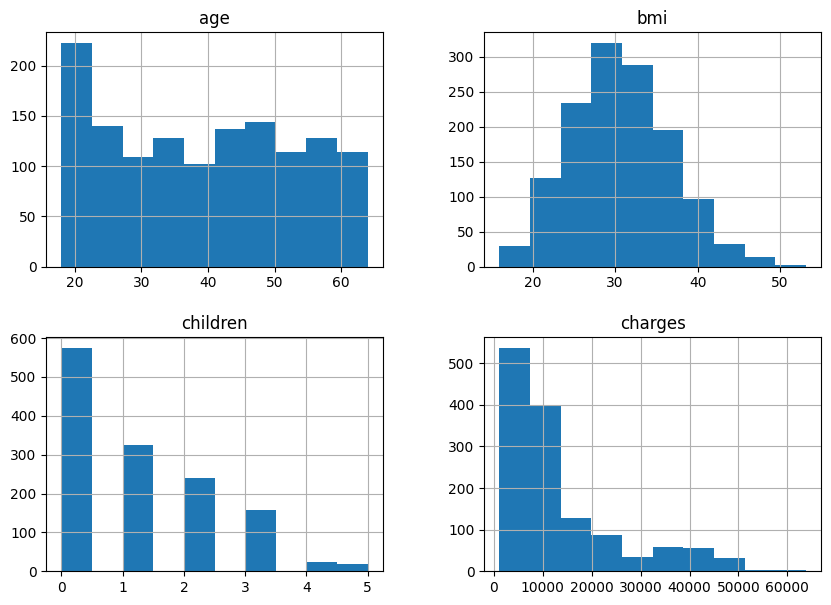

In [56]:
fig = plt.figure(figsize = (10,7))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

### Outliers

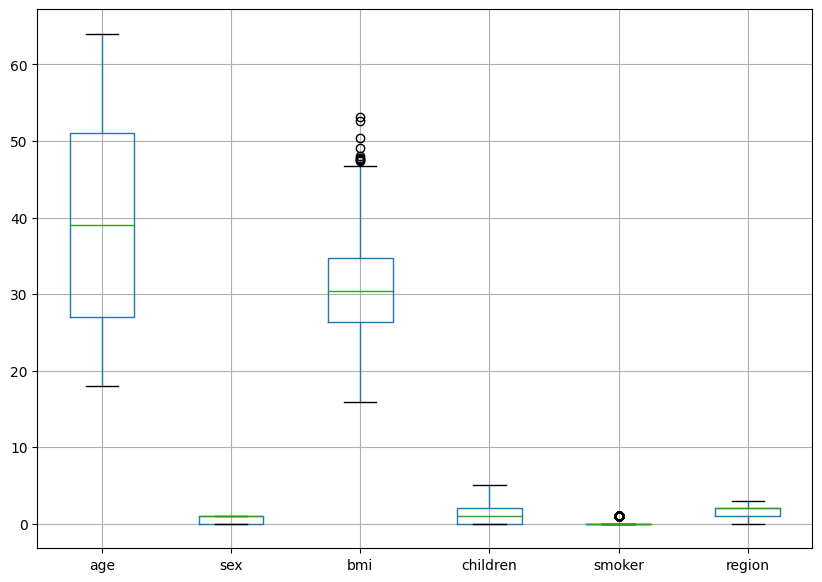

In [57]:
boxplot = X.boxplot(figsize=(10, 7))

In [58]:
df.loc[df['bmi'] > 45]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
292,25,male,45.54,2,yes,southeast,42112.23560
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
582,39,male,45.43,2,no,southeast,6356.27070


# Preprocessing/Train test split

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [60]:
X = df.drop('charges',axis=1)
y = df['charges']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Model 1 - Linear regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1 = make_pipeline(StandardScaler(), LinearRegression())

In [63]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [64]:
model_1.score(X_test,y_test)

0.7668905583460908

In [65]:
y_pred = model_1.predict(X_test)

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
r2_m1 = r2_score(y_test, y_pred)
mse_m1 = mean_squared_error(y_test, y_pred)
print("R2 score for model 1 =", r2_m1)

R2 score for model 1 = 0.7668905583460908


In [68]:
print("Mean squared error for model 1 =", mse_m1)

Mean squared error for model 1 = 35174149.32705306


# Model 2 - Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
model_2 =make_pipeline(StandardScaler(), RandomForestRegressor()) 

In [70]:
model_2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [71]:
model_2.score(X_test, y_test)

0.8484299401426575

In [72]:
y_pred = model_2.predict(X_test)

In [73]:
r2_m2 = r2_score(y_test, y_pred)
print("R2 score for model 2 =",r2_m2)

R2 score for model 2 = 0.8484299401426575


In [74]:
mse_m2 = mean_squared_error(y_test, y_pred)
print("Mean squared error for model 2 =", mse_m2)

Mean squared error for model 2 = 22870579.07696349
